# Исследование данных о компьютерных играх

Описание проекта

Заказчик -интернет-магазин, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Наша задача** - выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке компьютерных игр. Требуется выявить определяющие успешность игры закономерности. Это позволит компании выбрать потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

В полученных данных есть следующие столбцы:
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Ход исследования:**
Данные из открытых источников мы получим из файла,предоставленного заказчиком исследования.
Нам известо, что данные за 2016 г. могут быть неполным. О качестве остальных данных ничего не известно. Поэтому перед выполнением исследования понадобится провести обзор данных.

Мы проверим данные на ошибки, пропуски и дубликаты и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных.

**Исследование пройдет в 7 этапов:**

1.Обзор данных

2.Предобработка данных

3.Добавление новых столбцов

4.Исследовательский анализ данных

5.Составление портрета пользователя каждого региона

6.Проверка гипотез

7.Общий вывод


## Обзор данных
# Откроем файл с данными и изучим общую информацию. 

### Импортируем необходимые для анализа библиотеки pandas, matplotlib, numpy, scipy

Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`. 

In [1]:
# импорт библиотеки pandas
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
 # прочитали csv-файл и сохранили в переменную `data`
data = pd.read_csv('***')

### Выведем первые 15 строчек датафрейма data на экран

In [3]:
display(data.head(15)) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В названиях стобцов сразу видны нарушения стиля: строчные буквы сочетаются с прописными. Устраним проблему, приведем названия столбцов к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()

Проверим результат. Для этого еще раз выведем на экран названия столбцов.

In [5]:
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Выведем основную информацию о датафрейме с помощью метода info()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** После первичного обзора исходных данных можем сказать, что мы имеем датасет размером 16715 строк, состоящий из 11 столбцов.
В данных обнаружены пропуски и столбцы, в которых требуется поменять тип данных. 

Требуется устранить проблемы в данных. Для этого займемся их предобработкой.

## Предобработка данных
#  Изменение типов данных и удаление пропусков

### Изменение типов данных
* В столбце `year_of_release` был обнаружен вещественный тип данных. Его необходимо изменить на целочисленный, т.к. год выпуска игры не может быть дробным. Сделаем это с помощью метода astype(). 

Также в столбце `year_of_release` обнаружены пропуски (около 1%). Причина появления пропусков неясна, возможно не указаны по невнимательности, поэтому их можно либо удалить либо заменить их на 0.

In [7]:
data['year_of_release'] = data['year_of_release'].fillna(0)

In [8]:
# изменим на целочисленный тип данных
data['year_of_release'] = data['year_of_release'].astype('int')
# проверим поменялся ли тип данных
data['year_of_release'].head() 


0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

In [9]:
# проверим удалены ли пропуски
data['year_of_release'].isna().sum() 

0

В столбце `user_score` был обнаружен строковый тип данных. Его необходимо изменить на вещественный, по аналогии со столбцом `critic_score`. Сделаем это с помощью метода to_numeric(). 
Рассмотрим уникальные значения в столбце `user_score`.

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

* В столбце `user_score` обнаружены пропуски и значения 'tbd'. Дословно в переводе с английского 'tbd' означает 'будет определен'. Для нас это говорит о том, что рейтинг отсутствует в данных. Возможная причина отсутствия рейтинга-непопулярность игры среди пользователей. Заменим значения 'tbd' на Nan.

In [11]:
# добавили параметр errors, чтобы значения tbd заменились на Nan
data.user_score = pd.to_numeric(data['user_score'],errors = 'coerce') 

Аномальных значений не обнаружено (все в пределах 10, как в описании к данным).
Пропуски удалять и заполнять медианой не будем, т.к. это может повлиять на результат исследования.

Также обнаружены пропуски в столбце `critic_score`. Возможно пропуски связаны с тем, что игры не набирали высоких рейтингов от пользователей и соответственно не выдвигались для оценки со стороны критиков. Пропуски удалять не будем, т.к. их отсутствие это тоже важная информация, которая возможно пригодится при дальнейшем анализе.

Пропуски в столбце `rating` могут быть связаны с тем, что компании не обязаны предоставлять игру на определение рейтинга до начала официальных продаж. Пропуски заменим на строку 'unknown'.

In [12]:
data['rating'] = data['rating'].fillna('unknown') 

In [13]:
data['rating'].isna().sum()

0

Типы данных изменены в двух столбцах: `year_of_release`, `user_score`.

Пропуски заполнены в столбцах `year_of_release` на 0. Значения tbd заменены на Nan в столбце `user_score`.
Пропуски в столбцах `critic_score` и `user_score`оставили без изменений.
Пропуски в столбце `rating` заменили на значение 'unknown'.

### Обработка дубликатов

In [14]:
# проверим есть ли строки-дубликаты в наших данных
data.duplicated().sum() 

0

**Вывод**

Предобработка обнаружила четыре основные проблемы в данных:

* нарушения стиля в названиях столбцов,
* пропущенные значения,
* неверный тип данных,
* значение 'tbd' в числовых оценках пользователей.

Пропуски заполнены в столбцах `year_of_release` на '0'. Значения 'tbd' заменены на Nan в столбце `user_score`. 

Пропуски в столбце `critic_score` и `user_score` оставили без изменений,т.к.замена их сторонними значениями может существенно повлиять на все исследование. Также обнаружена особенность, что при наличии пропуска в столбце `critic_score`, присутствует пропуск в той же строке в столбце `user_score`. Это может говорить о том, что игра выпускалась например только для японского рынка и оценки ставились только там, а в других регионах она не оценивалась.

Пропуски в столбце `rating` заменили на значение 'unknown'. 

Типы данных изменены в двух столбцах: `year_of_release`, `user_score`.

При обработке дубликатов выяснили, что строки-дубликаты во всем датафрейме отсутствуют. 

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [15]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [16]:
# проверим добавился ли столбец
data.head() 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## Проведем исследовательский анализ данных

### Посмотрим сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [17]:
# сделаем сводную таблицу по годам выпуска и наименованию игры
pivot_table_year_of_release = data.query('year_of_release > 0').pivot_table(index = 'year_of_release', values = 'name',aggfunc ='count').reset_index()

#display(pivot_table_year_of_release.sort_values(by = 'name',ascending=False)) 
# отсортируем по убыванию и выведем на экран
pivot_table_year_of_release.columns = ['year_of_release','count']



Для наглядности построим линейный график.

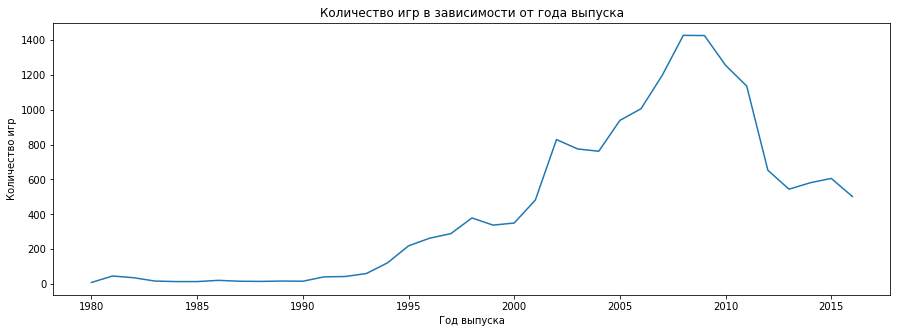

In [18]:
plt.figure(figsize=(15,5))

sns.lineplot(x='year_of_release', y='count', data=pivot_table_year_of_release)
# подпишем название графика
plt.title('Количество игр в зависимости от года выпуска'); 
# подпишем ось x
plt.xlabel('Год выпуска'); 
# подпишем ось y
plt.ylabel('Количество игр'); 

Из графика мы видим, что меньше всего игр было выпущено с 1980 по 1993 гг.
С 1994 г. количество игр, выпускаемых в год начинает расти и к 2002 г. в год уже выпускается около 829 игр. 
В 2003 и 2004 гг. количество игр немного синизилось, а с 2005 г. идет рост, который достигает своего пика в 2008 г. и 2009 г.(1427 и 1426 игр соответственно).
С 2010 г. опять начинается спад в игровой индустрии, и с 2012 г. по 2016 г. количество игр,выпущенных на рынок находится в пределах от 653 до 502 игр соответственно.
Также мы видим, что в данных есть пропуски, но их количество (269) не повлияет на ход исследования.

Следовательно, можем сделать вывод, что данные за все периоды нам не важны, т.к. по ним не получится выявить закономерности, определяющие успешность игр. Часть данных просто не актуальна, из-за сроков давности. Для нашего анализа наиболее релевантным видится промежуток с 2014-2016 гг., т.к. после 2016 г. возможен очередной подьем и это позволит нам спланировать рекламные кампании.

### Посмотрим, как менялись продажи по платформам. 
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Узнаем за какой характерный срок появляются новые и исчезают старые платформы.

Сделаем сводную таблицу по платформам с наибольшими суммарными продажами. 

In [19]:
# cделаем сводную таблицу по платформам и суммарным продажам
pivot_table_total_sales = data.pivot_table(index = 'platform',values = 'total_sales',aggfunc ='sum').\
sort_values(by = 'total_sales',ascending=False).head(6)

pivot_table_total_sales

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


Построим графики распределения суммарных продаж по годам для каждой из лидирующих платформ.

In [20]:
pivot_table_total_sales.index


Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

PS2


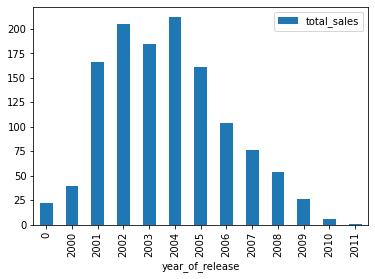

X360


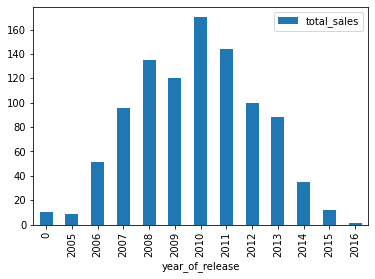

PS3


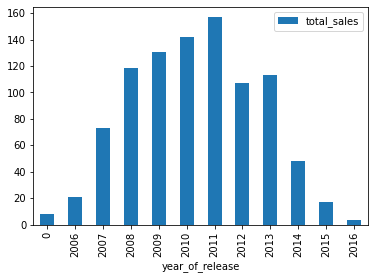

Wii


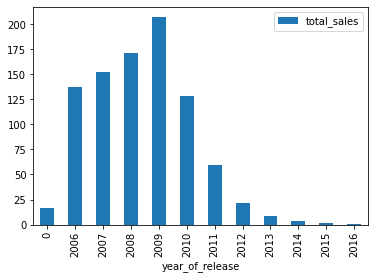

DS


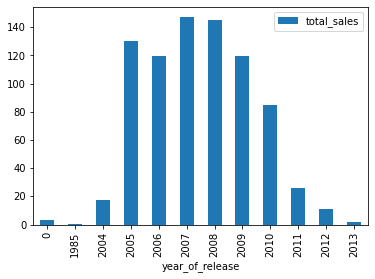

PS


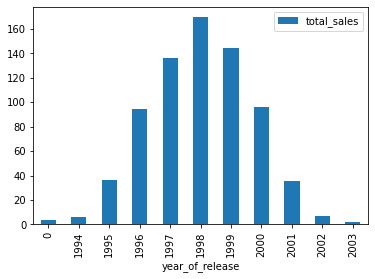

In [21]:
for platform in pivot_table_total_sales.index:
    print(platform)
    (data.query('platform == @platform').pivot_table(index = 'year_of_release',values = 'total_sales',aggfunc ='sum'))\
    .plot(kind='bar')
    plt.show()

**Распределение продаж по годам для PS2**

In [22]:
# сделаем сводную таблицу для PS2
PS2 = data.query('platform == "PS2"').pivot_table\
(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').reset_index() 
PS2.describe()

,year_of_release,total_sales
count,13.000000,13.000000
mean,1851.230769,96.597692
std,556.236334,79.242573
min,0.000000,0.450000
25%,2002.000000,26.400000
50%,2005.000000,75.990000
75%,2008.000000,166.430000
max,2011.000000,211.810000


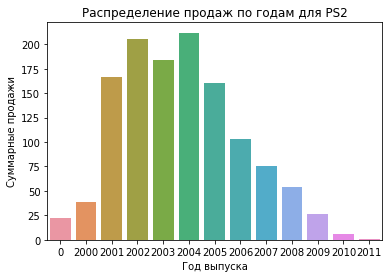

In [23]:
sns.barplot(data = PS2, x = 'year_of_release', y = 'total_sales');
# подпишем название графика
plt.title('Распределение продаж по годам для PS2'); 
plt.xlabel('Год выпуска');
plt.ylabel('Суммарные продажи'); 

**Распределение продаж по годам для X360**

In [24]:
# сделаем сводную таблицу для X360
X360 = data.query('platform == "X360"').pivot_table\
(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').reset_index() 


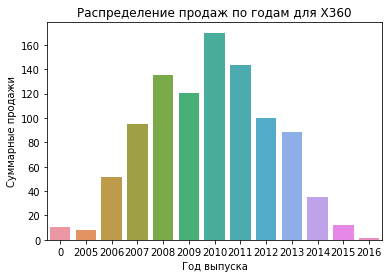

In [25]:
sns.barplot(data = X360, x = 'year_of_release', y = 'total_sales');

plt.title('Распределение продаж по годам для X360');
plt.xlabel('Год выпуска'); 
plt.ylabel('Суммарные продажи'); 

**Распределение продаж по годам для PS3**

In [26]:
# сделаем сводную таблицу для PS3
PS3 = data.query('platform == "PS3"').pivot_table\
(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').reset_index() 


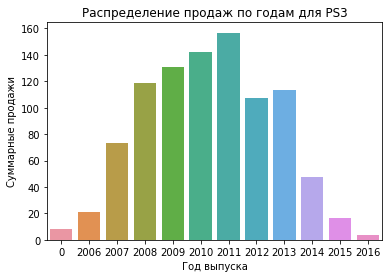

In [27]:
sns.barplot(data = PS3, x = 'year_of_release', y = 'total_sales');

plt.title('Распределение продаж по годам для PS3'); 
plt.xlabel('Год выпуска'); 
plt.ylabel('Суммарные продажи'); 

**Распределение продаж по годам для Wii**

In [28]:
Wii = data.query('platform == "Wii"').pivot_table\
(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').reset_index() 


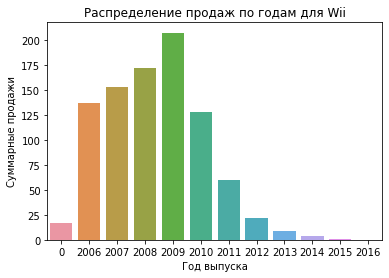

In [29]:
sns.barplot(data = Wii, x = 'year_of_release', y = 'total_sales');

plt.title('Распределение продаж по годам для Wii'); 
plt.xlabel('Год выпуска');
plt.ylabel('Суммарные продажи'); 

**Распределение продаж по годам для DS**

In [30]:
# сделаем сводную таблицу для DS
DS = data.query('platform == "DS"').pivot_table\
(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').reset_index() 


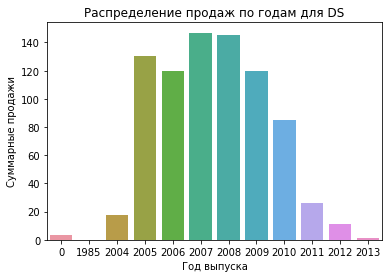

In [31]:
sns.barplot(data = DS, x = 'year_of_release', y = 'total_sales');

plt.title('Распределение продаж по годам для DS'); # подпишем название графика
plt.xlabel('Год выпуска'); # подпишем ось x
plt.ylabel('Суммарные продажи'); # подпишем ось y

**Распределение продаж по годам для PS**

In [32]:
 # сделаем сводную таблицу для PS
PS = data.query('platform == "PS"').pivot_table\
(index = 'year_of_release', values = 'total_sales',aggfunc = 'sum').reset_index()

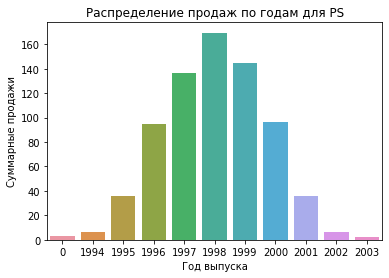

In [33]:
sns.barplot(data = PS, x = 'year_of_release', y = 'total_sales');

plt.title('Распределение продаж по годам для PS'); 
plt.xlabel('Год выпуска'); 
plt.ylabel('Суммарные продажи'); 

### Определим актуальный период для дальнейшего исследования и построения прогноза на 2017 г.

Рассмотрев распределение суммарных продаж по 6 лидирующим платформам, можно отметить, что в среднем пик продаж наступает через 3 года после выпуска платформы. Далее проходит еще 4 года, когда платформа остается популярной,но постепенно 'уходит' c рынка, об этом говорит снижение продаж на графиках. Поэтому характерным сроком за который появляются и исчезают платформы, приносящие максимальные продажи, можно считать 7-летний период.

Исходя из изученных выше вопросов, возьмем данные за 2014-2016 гг. 5 из 6 рассмотренных платформ (кр.PS) потеряли популярность в среднем к 2014 г. и поэтому вполне вероятно предположить, что на рынок выйдут новые платформы с перспективами продаж.
Мы будем считать эти данные актуальными и они помогут нам построить прогноз на 2017 г. 

Далее в анализе рассмотрим только платформы и игры,которые лидируют по продажам (или падают) с 2014 г.

### Выберем потенциально прибыльные платформы

Для этого изучим какие платформы лидируют по продажам, растут или падают.

In [34]:
# сделаем сводную таблицу для прибыльных платформ c 2014 г.
top_platform = data.query('year_of_release >= 2014').pivot_table\
(index = ['platform','year_of_release'], values = 'total_sales',aggfunc = 'sum').reset_index()

top_platform.sort_values(by = 'total_sales',ascending=False).head(15)

,platform,year_of_release,total_sales
10,PS4,2015,118.90
9,PS4,2014,100.00
11,PS4,2016,69.25
27,XOne,2015,60.14
26,XOne,2014,54.07
6,PS3,2014,47.76
0,3DS,2014,43.76
23,X360,2014,34.74
1,3DS,2015,27.78
28,XOne,2016,26.15


Рассмотрев динамику продаж, можно сделать вывод о том, что за эти 3 года потенциально прибыльными были следующие платформы: **PS4,XOne,3DS**. 

В 2015 г. идет рост продаж у PS4,XOne. Но к 2016 г. продажи стали падать.

У остальных платформ в целом идет падение продаж с 2014 г.

Наблюдается тенденция снижения продаж для большинства платформ в течение предыдущих 3-х лет,в этой связи мы может предположить, что к 2017 г. могут появиться новые платформы.

### Построим график 'ящик с усами' по глобальным продажам игр в разбивке по платформам. Опишем результат.


In [35]:
# сделаем срез по 3-м потенциально прибыльным платформам
popular_platforms = top_platform[top_platform['platform'].isin(['PS4','XOne','3DS'])] 

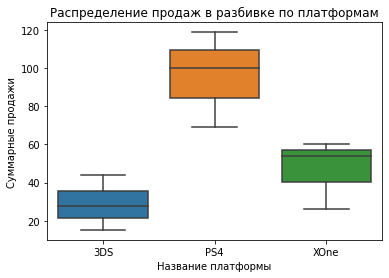

In [36]:
sns.boxplot(x='platform', y='total_sales', data=popular_platforms);

plt.title('Распределение продаж в разбивке по платформам'); # подпишем название графика
plt.xlabel('Название платформы'); # подпишем ось x
plt.ylabel('Суммарные продажи'); # подпишем ось y

Из трех лидирующих платформ, максимальные продажи за все 3 года принесла лишь PS4. Все данные о продажах лежат в промежутке около от 70 до 120 млн. копий. При этом 50% значений лежит в промежутке: 110 млн-90 млн=20 млн. Максимальные продажи: на графике мы видим, что граница ее верхнего уса расположена выше всего по шкале продаж (около 120 млн.копий в 2015 г.).При этом медиана и длина нижнего 'уса' говорит о том, что половина игр для PS4 была продана в размере от 70 до 100 млн.копий, а другая половина (верний 'ус' короче, значения распределены ближе друг к другу) от 100 до 120 млн.копий.

Далее на втором месте находится платформа XOne. Разброс данных лежит в промежутке около от 26 до 60 млн.копий. Что почти в два раза меньше по сравнению с лидером PS4. Также, мы видим что медиана расположена в верхней части коробки и длина верхнего уса значительно короче нижнего. Значит менее 50% значений расположены в диапазоне от 26 до 55 млн.копий.Рост продаж наблюдался от 55 до 60 млн.копий (с 2014 по 2015 гг.), а далее идет значительный спад продаж до 26 млн. в 2016 г. При этом межквартильный размах (50% значений) составляет 15 млн.копий (55 млн-40 млн=15 млн).

На третьем месте по глобальным продажам игр находится платформа 3DS. Данные о продажах находятся в промежутке около от 15 до 43 млн.копий с 2014 года. Медиана расположена посередине, что говорит нам о том, что значения продаж распределены равномерно, без резких спадов или подъемов продаж. Ящик уже,межквартильный размах здесь составляет около 37-22=15 млн.копий. 

**В итоге лидером по глобальным продажам игр становится платформа PS4.**

### Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.


In [37]:
# подготовим сводную таблицу по суммарным продажам игр с 2014 г. для PS4
#и оценкам крититиков и пользователей, подсчитаем сумму оценок
ps4corr = data.query('year_of_release >= 2014 & platform == "PS4"').pivot_table\
(index = 'total_sales',values = ['critic_score','user_score'],aggfunc = 'sum').reset_index() 

ps4corr.sort_values(by='critic_score', ascending=False) #отсортируем по убыванию оценок

,total_sales,critic_score,user_score
1,0.02,891.0,100.7
4,0.05,736.0,75.0
7,0.07,554.0,59.9
3,0.04,523.0,59.4
2,0.03,488.0,42.5
...,...,...,...
104,1.32,0.0,0.0
105,1.40,0.0,0.0
106,1.49,0.0,0.0
112,1.75,0.0,0.0


In [38]:
# найдем коэффициент корреляции между оценками критиков и продажами методом corr()
ps4corr['critic_score'].corr(ps4corr['total_sales']) 

-0.2161795148157077

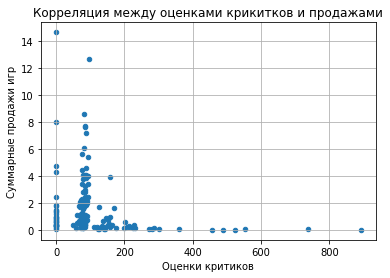

In [39]:
ps4corr.plot(x='critic_score', y='total_sales', kind = 'scatter',grid=True);

plt.title('Корреляция между оценками крикитков и продажами'); # подпишем название графика
plt.xlabel('Оценки критиков'); # подпишем ось x
plt.ylabel('Суммарные продажи игр'); # подпишем ось y

In [40]:
# найдем коэффициент корреляции между оценками пользователей и продажами методом corr()
ps4corr['user_score'].corr(ps4corr['total_sales'])


-0.24366674399231006

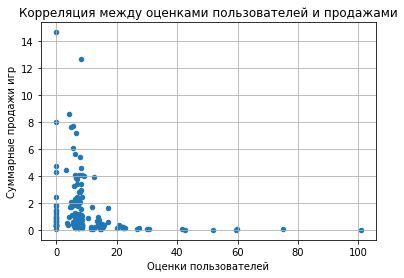

In [41]:
ps4corr.plot(x='user_score', y='total_sales', kind = 'scatter',grid=True);

plt.title('Корреляция между оценками пользователей и продажами'); 
plt.xlabel('Оценки пользователей'); 
plt.ylabel('Суммарные продажи игр'); 

Полученные коэффициенты корреляции в размере -0.22 и -0.24 и диаграммы рассеяния наглядно показывают нам, что связь как между оценками критиков и продажами так и между оценками пользователей и продажами очень слабая и присутствует отрицательная корреляция. То есть при росте оценков критиков/пользователей суммарные продажи как правило не увеличиваются, а наоборот либо остаются на том же уровне либо уменьшаются. Это довольно странно в данной ситуации. Ведь пользовательские оценки влияют на спрос, а положительные оценки критиков должны способствовать максимальным продажам.

В связи с этим,предположим, что существует некий третий фактор, влияющий на увеличение продаж напрямую.

### Соотнесем выводы с продажами игр на других платформах

Подготовим сводную таблицу по суммарным продажам игр с 2014 г. для **XOne** и оценкам крититиков и пользователей, подсчитаем сумму оценок


In [42]:
#сделаем срез по данным с2014 г. 
xone_corr = data.query('year_of_release >= 2014 & platform == "XOne"').pivot_table\
(index = 'total_sales',values = ['critic_score','user_score'],aggfunc = 'sum').reset_index() 
#отсортируем по убыванию оценок
xone_corr.sort_values(by='critic_score', ascending=False) 

,total_sales,critic_score,user_score
0,0.01,595.0,110.9
3,0.04,457.0,43.1
1,0.02,432.0,44.1
19,0.15,307.0,31.0
2,0.03,278.0,27.4
...,...,...,...
101,2.76,0.0,0.0
45,0.45,0.0,0.0
50,0.48,0.0,0.0
58,0.61,0.0,0.0


In [43]:
xone_corr['critic_score'].corr(xone_corr['total_sales'])

-0.243830373559005

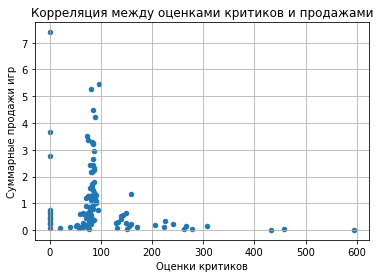

In [44]:
xone_corr.plot(x='critic_score', y='total_sales', kind = 'scatter',grid=True);

plt.title('Корреляция между оценками критиков и продажами'); 
plt.xlabel('Оценки критиков'); 
plt.ylabel('Суммарные продажи игр');

In [45]:
# найдем коэффициент корреляции между оценками пользователей и XOne продажами методом corr()
xone_corr['user_score'].corr(xone_corr['total_sales'])

-0.24783488998401723

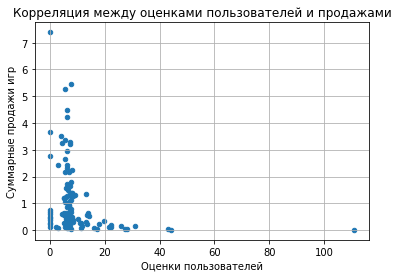

In [46]:
xone_corr.plot(x='user_score', y='total_sales', kind = 'scatter',grid=True);

plt.title('Корреляция между оценками пользователей и продажами'); 
plt.xlabel('Оценки пользователей'); 
plt.ylabel('Суммарные продажи игр'); 

Подготовим сводную таблицу по суммарным продажам игр с 2014 г. для **3DS** и оценкам крититиков и пользователей, подсчитаем сумму оценок.

In [47]:
#сводная таблица по срезу 
ds3_corr = data.query('year_of_release >= 2014 & platform == "3DS"').pivot_table\
(index = 'total_sales',values = ['critic_score','user_score'],aggfunc = 'sum').reset_index() 

ds3_corr.sort_values(by='critic_score', ascending=False) #отсортируем по убыванию оценок

,total_sales,critic_score,user_score
5,0.06,254.0,15.3
9,0.08,204.0,14.6
1,0.02,150.0,18.8
3,0.04,146.0,13.6
24,0.21,145.0,14.7
...,...,...,...
53,0.57,0.0,0.0
54,0.62,0.0,7.2
55,0.63,0.0,0.0
56,0.69,0.0,5.4


In [48]:
# найдем коэффициент корреляции между оценками критиков и продажами 3DS методом corr()
ds3_corr['critic_score'].corr(ds3_corr['total_sales'])

-0.2027473135939

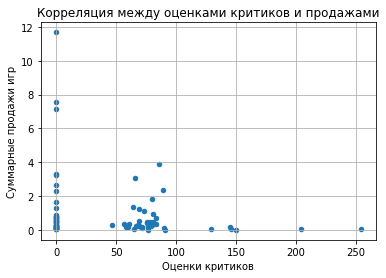

In [49]:
ds3_corr.plot(x='critic_score', y='total_sales', kind = 'scatter',grid=True);

plt.title('Корреляция между оценками критиков и продажами'); 
plt.xlabel('Оценки критиков'); 
plt.ylabel('Суммарные продажи игр'); 

In [50]:
# найдем коэффициент корреляции между оценками пользователей и продажами 3DS методом corr()
ds3_corr['user_score'].corr(ds3_corr['total_sales'])

-0.238477055847038

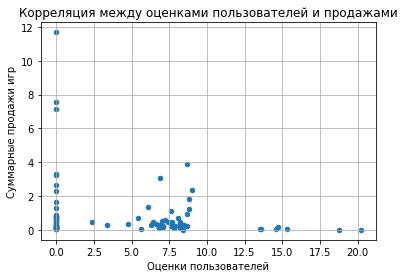

In [51]:
ds3_corr.plot(x='user_score', y='total_sales', kind = 'scatter',grid=True);

plt.title('Корреляция между оценками пользователей и продажами'); 
plt.xlabel('Оценки пользователей'); 
plt.ylabel('Суммарные продажи игр');

Рассмотрев еще 2 наиболее прибыльные платформы (XOne и 3DS) можем сделать вывод о том, что здесь тоже присутствует слабая отрицательная корреляция. 
Если сравнивать количество оценок пользователей и критиков, то у этих платформ их меньше по сранению с PS4.
Также из диаграмм видно, что у платформы 3DS достаточно низкие суммарные оценки как пользователей (до 10), так и критиков (от 50 до 100 в сумме) и практически не меняются.

### Посмотрим на общее распределение игр по жанрам.
Определим самые прибыльные жанры. Выделяются ли жанры с высокими и низкими продажами.

In [52]:
# посмотрим общее распределение игр по жанрам
data['genre'].value_counts() 

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Всего 12 жанров. Наиболее распространенные жанры это Action,Sports,Misc,Role-Playing,Shooter.

Посмотрим какие из жанров являются самыми прибыльными в нашем актуальном периоде с 2014 г. Для этого сделаем сводную таблицу по жанрам игр и суммарным продажам с 2014 г., рассчитаем среднее, медиану,количество и сумму.

In [53]:
# отсортируем по убыванию и выведем 10 жанров с наибольшими продажами
games_genre = data.query('year_of_release >= 2014').pivot_table\
(index = 'genre',values = 'total_sales',aggfunc = ['median', 'mean', 'count', 'sum']).reset_index() 

games_genre.columns = ['genre','median', 'mean', 'count', 'sum']
games_genre.sort_values(by = 'median',ascending=False)


,genre,median,mean,count,sum
8,Shooter,0.515,1.335469,128,170.94
10,Sports,0.180,0.680000,161,109.48
4,Platform,0.140,0.476053,38,18.09
2,Fighting,0.125,0.470333,60,28.22
7,Role-Playing,0.110,0.459005,221,101.44
9,Simulation,0.100,0.298409,44,13.13
0,Action,0.090,0.322068,619,199.36
3,Misc,0.090,0.332301,113,37.55
6,Racing,0.090,0.398841,69,27.52
11,Strategy,0.060,0.107027,37,3.96


Самыми прибыльными оказались жанры: 
* Shooter, их медианная продажа выше всех остальных жанров, но по количеству продаж шутеры находятся на 4-м месте (128)
* Sports, медиана продаж 0,180 млн.копий и по количеству на 3-м месте (161)
* Platform, медиана продаж 0,140 млн.копий и по количеству - 38.


Жанры с высокими и низкими продажами значительно выделяются друг от друга. 
Разброс значений по продажам от 2.21 млн. копий до 199.36 млн.копий по всем регионам в целом.

Самыми низкоприбыльными являются игры с жанрами:Puzzle,Strategy,Racing. 

Можно сделать вывод о том, что большое разнообразие игр и количество игр вовсе не гарантирует высокие продажи.
Мы видим, что есть жанры с очень большим количеством игр, но при этом это не гарантия того, что жанр в целом будет прибыльным. 
Также есть жанры, где игр не так много, но продажи высокие, возможно за счет самой популярной игры в этом жанре, которая больше всего приносит дохода.

Поэтому рекомендуем сосредоточиться на качестве игр, чем выпускать массово, не учитывая потребности и оценки пользователей и критиков.
Поэтому при планировании продаж и при прогнозе на 2017 г. следует тщательно отбирать игры в том числе и по жанрам.	

## Составим портрет пользователя каждого региона (NA, EU,JP)

* Определим самые популярные платформы (топ-5). Опишем различия в долях продаж.
* Выявим самые популярные жанры (топ-5). Объясним разницу.
* Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

Определим самые популярные платформы и жанры для **Северной Америки**. Для этого сделаем сводную таблицу по продажам платформ для данного региона с 2014 г.

In [54]:
# сделаем сводную таблицу для популярных платформ в Северной Америке
# остортируем значения по убыванию
top5_platform_na = data.query('year_of_release >= 2014').pivot_table\
(index = 'platform', values = ['na_sales','total_sales'],aggfunc = 'sum').sort_values(by = 'na_sales',ascending=False).head()


In [55]:
# добавим столбец, где посчитаем долю продаж, значения округлим до 2-х знаков
top5_platform_na['part'] = (top5_platform_na['na_sales'] / top5_platform_na['total_sales'] *100).round(2) 

top5_platform_na 

,na_sales,total_sales,part
platform,,,
PS4,98.61,288.15,34.22
XOne,81.27,140.36,57.90
X360,28.30,48.22,58.69
3DS,22.64,86.68,26.12
PS3,22.05,68.18,32.34


Для Северной Америки самыми популярными являются платформы: PS4,XOne,X360,3DS,PS3.

Максимальные продажи у платформы PS4 (98,61 млн.копий в регионе), при этом доля продаж данной платформы в общих продажах по всем регионам составляет 34,22 %.

На 5-месте по продажам находится платформа PS3 (22,05 млн.копий), при этом доля продаж составляет 32,34%.

По максимальной доле продаж в общих продажах занимает платформа X360(58,69%), при этом в данном регионе эта платформа продавалась меньше(в среднем на 3-м месте).

In [56]:
# сводная таблица по продажам с распределением по жанрам для Северной Америки
# отсортируем по убыванию и выведем 5 жанров с наибольшими продажами
top5_genre_na = data.query('year_of_release >= 2014').pivot_table\
(index = 'genre',values = ['na_sales','total_sales'],aggfunc = 'sum').sort_values(by = 'na_sales',ascending=False).head()

In [57]:
# добавим столбец, где посчитаем долю продаж, значения округлим до 2-х знаков
top5_genre_na['part'] = (top5_genre_na['na_sales'] / top5_genre_na['total_sales'] *100).round(2) 

top5_genre_na

,na_sales,total_sales,part
genre,,,
Shooter,79.02,170.94,46.23
Action,72.53,199.36,36.38
Sports,46.13,109.48,42.14
Role-Playing,33.47,101.44,32.99
Misc,15.05,37.55,40.08


В Северной Америке лидируют по полулярности следующие жанры: Shooter,Action,Sports,Role-Playing,Misc (по убыванию популярности соответственно).

Определим самые популярные платформы и жанры для **Европы**. Для этого сделаем сводную таблицу по продажам платформ для данного региона с 2014 г.

In [58]:
# сделаем сводную таблицу для популярных платформ в Европе
# остортируем значения по убыванию
top5_platform_eu = data.query('year_of_release >= 2014').pivot_table\
(index = 'platform', values = ['eu_sales','total_sales'],aggfunc = 'sum').sort_values(by = 'eu_sales',ascending=False).head()

In [59]:
# добавим столбец, где посчитаем долю продаж, значения округлим до 2-х знаков
top5_platform_eu['part'] = (top5_platform_eu['eu_sales'] / top5_platform_eu['total_sales'] *100).round(2) 

top5_platform_eu 

,eu_sales,total_sales,part
platform,,,
PS4,130.04,288.15,45.13
XOne,46.25,140.36,32.95
PS3,25.54,68.18,37.46
PC,17.97,27.05,66.43
3DS,16.12,86.68,18.60


Для Европы самыми популярными являются платформы: PS4,XOne,PS3,PC,3DS. 

Максимальные продажи также как и в Северной Америке у платформы PS4 (130,04 млн.копий в регионе), при этом доля продаж данной платформы в общих продажах по всем регионам составляет 45,13 %. То есть в Европе продаж PS4  больше, чем в Северной Америке.
В середине находится PS3 (25.54 млн.копий), при этом доля продаж в общих продажах тоже выше по сравнению с Северной Америкой (37,46 %).

На 5-месте по продажам находится платформа 3DS (16,12 млн.копий), при этом доля продаж составляет всего 18,60%. То есть в Европе платформа 3DS продается меньше всего и наименее популярна среди пользователей.

По максимальной доле продаж в общих продажах занимает платформа PC(66,43%), при этом в данном регионе эта платформа продавалась  меньше(в среднем на 4-м месте, 17.97 млн.копий).

In [60]:
# сводная таблица по продажам с распределением по жанрам
# отсортируем по убыванию и выведем 5 жанров с наибольшими продажами
top5_genre_eu = data.query('year_of_release >= 2014').pivot_table\
(index = 'genre',values = ['eu_sales','total_sales'],aggfunc = 'sum').sort_values(by = 'eu_sales',ascending=False).head()

In [61]:
# добавим столбец, где посчитаем долю продаж, значения округлим до 2-х знаков
top5_genre_eu['part'] = (top5_genre_eu['eu_sales'] / top5_genre_eu['total_sales'] *100).round(2) 

top5_genre_eu

,eu_sales,total_sales,part
genre,,,
Action,74.68,199.36,37.46
Shooter,65.52,170.94,38.33
Sports,45.73,109.48,41.77
Role-Playing,28.17,101.44,27.77
Racing,14.13,27.52,51.34


В Европе лидируют по полулярности следующие жанры: Action,Shooter,Sports,Role-Playing,Racing (по убыванию популярности соответственно).

В отличии от  Северной Америки в Европе наиболее популярны игры с жанром Action, а потом Shooter. Также как и в Северной Америке на 3-м и 4-м месте находится игры с жанром Sports и Role-Playing.

На 5-м месте в Европе находится жанр Racing, а в Северной Америке был Misc. При этом данный жанр лидирует по доле продаж в общих продажах и его доля составляет 51,34%.

Определим самые популярные платформы и жанры для **Японии**. Для этого сделаем сводную таблицу по продажам платформ для данного региона с 2014 г.

In [62]:
# сделаем сводную таблицу для популярных платформ в Японии
# остортируем значения по убыванию
top5_platform_jp = data.query('year_of_release >= 2014').pivot_table\
(index = 'platform', values = ['jp_sales','total_sales'],aggfunc = 'sum').sort_values(by = 'jp_sales',ascending=False).head()

In [63]:
# добавим столбец, где посчитаем долю продаж, значения округлим до 2-х знаков
top5_platform_jp['part'] = (top5_platform_jp['jp_sales'] / top5_platform_jp['total_sales'] *100).round(2) 

top5_platform_jp

,jp_sales,total_sales,part
platform,,,
3DS,44.24,86.68,51.04
PS4,15.02,288.15,5.21
PSV,14.54,22.40,64.91
PS3,11.22,68.18,16.46
WiiU,7.31,42.98,17.01


Для Японии самыми популярными являются платформы: 3DS,PS4,PSV,PS3,WiiU.

Максимальные продажи у платформы 3DS (44,24 млн.копий в регионе), при этом доля продаж данной платформы в общих продажах по всем регионам составляет 51,04 %. То есть Япония является лидером по продажам 3DS по сравнению с другими регионами. 

Также отличительной особенностью для Японии явлется присутствие на рынке платформы PSV (14.54 млн.копий), при этом доля продаж в общих продажах достаточно высокая и составляет (64,91 %).

На 5-месте по продажам находится платформа WiiU (7,31 млн.копий), при этом доля продаж составляет всего 17,01%. Данная платформа находится в рейтинге 5-ти самых популярных только в Японии.

Еще одно важное отличие японского рынка платформ - это минимальная доля продаж в общих продажах занимает платформа PS4(5,21%), при этом продажи в данном регионе составляют в среднем на 2-м месте, 15.02 млн.копий).

Японский рынок выделяется среди других регионов по популярности платформ.
Рассмотрим самые популярные жанры игр в Японии.

In [64]:
# сводная таблица по продажам с распределением по жанрам для Японии
# отсортируем по убыванию и выведем 5 жанров с наибольшими продажами

top5_genre_jp = data.query('year_of_release >= 2014').pivot_table\
(index = 'genre',values = ['jp_sales','total_sales'],aggfunc = 'sum').sort_values(by = 'jp_sales',ascending=False).head()

In [65]:
# добавим столбец, где посчитаем долю продаж, значения округлим до 2-х знаков
top5_genre_jp['part'] = (top5_genre_jp['jp_sales'] / top5_genre_jp['total_sales'] *100).round(2) 

top5_genre_jp

,jp_sales,total_sales,part
genre,,,
Role-Playing,31.16,101.44,30.72
Action,29.58,199.36,14.84
Fighting,6.37,28.22,22.57
Misc,5.61,37.55,14.94
Shooter,4.87,170.94,2.85


В Японии лидируют по полулярности следующие жанры: Role-Playing,Action,Fighting,Shooter,Misc,Shooter(по убыванию популярности соответственно).

В отличии от Северной Америки и Европы здесь наиболее популярны игры с жанром Role-Playing(31,16 млн.копий), а потом Action (29,58 млн.копий). 
Игры с жанром Sports вообще отсутствуют в топ 5-ти популярных жанрах Японии. На 3-м месте по популярности идет жанр Fighting (6,37 млн.копий), он присутствует в топ 5-ке самых популярных жанров только в Японии.	

На 5-м месте в Японии находится жанр Shooter (4,87 млн.копий), в отличии от других регионов где данный жанр занимает лидирующие позиции по популярности. При этом данный жанр также занимает низкие позиции по доле продаж в общих продажах (всего 2,85%).

Отличие в жанровых предпочтениях Японии объясняется достаточно строгим контролем за рейтингом игр и последующей их реализацией потребителям.

Для визуализации полученных выводов дополнительно сделаем диаграммы самых популярных платформ для каждого региона.

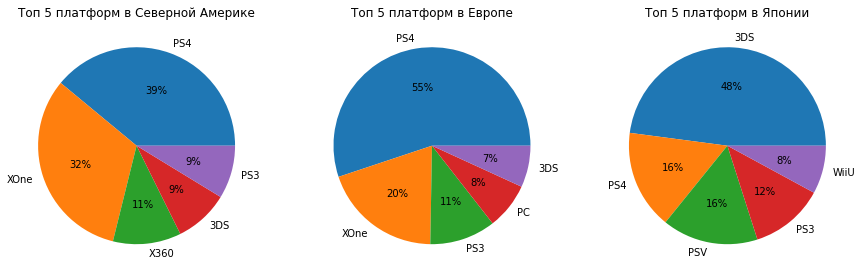

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5));

axs[0].pie(top5_platform_na['na_sales'], labels = top5_platform_na.index, autopct='%.0f%%'); 
# построим круговые диаграммы по регионам

axs[1].pie(top5_platform_eu['eu_sales'], labels = top5_platform_eu.index, autopct='%.0f%%');

axs[2].pie(top5_platform_jp['jp_sales'], labels = top5_platform_jp.index, autopct='%.0f%%');

axs[0].set_title('Топ 5 платформ в Северной Америке') # подпишем диаграммы
axs[1].set_title('Топ 5 платформ в Европе')
axs[2].set_title('Топ 5 платформ в Японии')


plt.show()

Для визуализации полученных выводов дополнительно сделаем диаграммы самых популярных жанров для каждого региона.

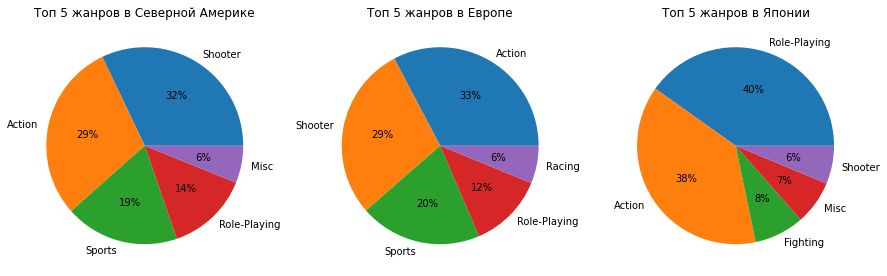

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5));

axs[0].pie(top5_genre_na['na_sales'], labels = top5_genre_na.index, autopct='%.0f%%'); 
# построим круговые диаграммы по регионам

axs[1].pie(top5_genre_eu['eu_sales'], labels = top5_genre_eu.index, autopct='%.0f%%');

axs[2].pie(top5_genre_jp['jp_sales'], labels = top5_genre_jp.index, autopct='%.0f%%');

axs[0].set_title('Топ 5 жанров в Северной Америке') # подпишем диаграммы
axs[1].set_title('Топ 5 жанров в Европе')
axs[2].set_title('Топ 5 жанров в Японии')

plt.show()

**Рассмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [68]:
# сделаем сводную таблицу для рейтинга 
rating_games = data.query('year_of_release >= 2014').pivot_table\
(index = 'rating', values = ['na_sales','eu_sales','jp_sales','total_sales'],aggfunc = 'sum').reset_index()

rating_games

,rating,eu_sales,jp_sales,na_sales,total_sales
0,E,58.06,8.94,50.74,133.13
1,E10+,26.16,4.46,33.23,71.68
2,M,93.44,8.01,96.42,226.54
3,T,34.07,14.78,38.95,99.13
4,unknown,58.95,56.90,64.72,198.97


Из таблицы мы видим следующее распределение продаж по регионам в зависимости от рейтинга:

«E» («Everyone») — «Для всех»-лидером является европейский рынок, на последнем месте Япония.

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: здесь также лидирует Европа,за ней идет Северная Америка.

«T» («Teen») — «Подросткам»: Европа на первом месте, затем Северная Америка.

«M» («Mature») — «Для взрослых»:  Северная Америка на первом месте, за ей Европа и в самом конце Япония.


Япония занимает последнее место в рейтингах, возможно из-за того, что там существует своя рейтинговая классификация, которая отличается от американской рейтинговой оценки ESRB. После присвоения рейтинга игра выходит на продажу только на японский рынок. Поэтому многие игры просто не попали не под какую классификацию в системе ESRB и имеют свой внутрияпонский рейтинг. Об этом говорит и значительное количество пропусков в данных по рейтингам.


## Проверим гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Для проверки статистической гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**,
сформулируем нулевую гипотезу: 

Ho = Средние пользовательские рейтинги платформ Xbox One и PC равны.

Тогда Н1 (альтернативная гипотеза) = Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Критический уровень статистической значимости зададим значением 0.05. Это означает, что если мы будем проводить эксперимент 100 раз и проверять на основе имеющихся у нас данных интересующую нас нулевую гипотезу,то в 5 случаях из 100 мы отвергнем нулевую гипотезу, хотя она будет верной.

In [69]:
XOne = data[(data['year_of_release'] >= 2014) & (data['platform'] == "XOne") & (data['user_score']>0)]['user_score']
PC = data[(data['year_of_release'] >= 2014) & (data['platform'] == "PC") & (data['user_score']>0)]['user_score']               

In [70]:
 # зададим критический уровень статистической значимости
alpha = 0.05
# проверим гипотезу о равенстве средних двух независимых совокупностей, используя специальный метод scipy.stats.ttest_ind ()
results = st.ttest_ind(XOne, PC, equal_var=False) 
# выведем на экран получившееся p-значение
print('p-значение:',results.pvalue) 
#сравним получившееся p-значение с заданным уровнем статистической значимости 
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


На имеющихся данных, на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.
Соответственно, можем сделать вывод о том, что с высокой степенью вероятности пользовательские средние рейтинги платформ Xbox One и PC будут одинаковыми.

**Для проверки статистической гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные**,
сформулируем нулевую гипотезу:

 Ho = Средние пользовательские рейтинги жанров Action и Sports равны.
 
 Тогда Н1 (альтернативная гипотеза) = Средние пользовательские рейтинги жанров Action и Sports равны не равны.
 
 Критический уровень статистической значимости зададим значением 0.05.

In [71]:
# сделаем выборку для жанра Action
action = data[(data['year_of_release'] >= 2014) & (data['genre'] == "Action") & (data['user_score']>0)]['user_score'] 
# сделаем выборку для жанра Sports
sports = data[(data['year_of_release'] >= 2014) & (data['genre'] == "Sports") & (data['user_score']>0)]['user_score']

In [72]:
# зададим критический уровень статистической значимости
alpha = 0.05 
# проверим гипотезу о равенстве средних двух независимых совокупностей, используя специальный метод scipy.stats.ttest_ind ()
results = st.ttest_ind(action, sports, equal_var=False) 

 # выведем на экран получившееся p-значение
print('p-значение:',results.pvalue)
 #сравним получившееся p-значение с заданным уровнем статистической значимости 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.
Соответственно, можем сделать вывод о том, что с низкой степенью вероятности пользовательские средние рейтинги жанров Action и Sports  будут одинаковыми.

## Общий вывод

**Общий вывод:**

Мы провели исследование исторических данных  из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель анализа:** выявление определяющих успешность игры закономерностей. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 г.

В ходе исследования был проведен обзор первоначальных данных, их предобработка, обнаружены и исправлены пропуски и нарушения стиля в заголовках столбцов, типы данных. Дополнительно мы добавили несколько столбцов для полноценного анализа. Для анализа данных были построены отдельные гистограммы, сделаны выводы. Также делали срезы данных, строили сводные таблицы и считали коэффциенты корреляции. В анализе использовались диаграммы рассеяния и столбчатые графики.
Был составлен портрет пользователя для каждого региона и проверены 2 гипотезы.

В процессе исследования нами был определен актуальный период с 2014 г. по 2016 г. Данный промежуток является наиболее релевантным,т.к. после 2016 г. возможен очередной подьем и это позволит нам спланировать рекламные кампании.
Дальнейший анализ основывался исходя из данных, полученнных в актуальном периоде.

**Проведен исследовательский анализ данных, в ходе которого установили, что на успешность игры влияют следующие закономерности:**
Рассмотрев динамику продаж по регионам, можно сделать вывод о том, что за эти 3 года потенциально прибыльными были следующие платформы: PS4,XOne,3DS.
Но при этом в целом наблюдается тенденция снижения продаж для большинства платформ за последние годы,в этой связи мы может предположить, что к 2017 г. могут появиться новые платформы.

Рассмотрев влияние на продажи отзывов пользователей и критиков, мы установили, что линейная связь отсутствует, следовательно рассматривать отзывы критиков и пользователей представляется не актуальным.

Наиболее потенциально популярный продукт можно выделить исходя из жанра игры. Так проведя анализ данных мы получили информацию о том, что самыми прибыльными оказались жанры:Shooter и Sports. 
Также мы увидели, что есть игры, которые приносят самую большую долю прибыли в общих продажах. Стоит сосредоточиться на выявлении таких игр и ждать их следующих релизов.
Самыми низкоприбыльными являются игры с жанрами:Puzzle,Strategy,Racing. Следует исключить игры с такими жанрами в планируемых продажах.

**Рассматривая потребителей по регионам** следует обращать внимание на следующие закономерности:

Для Северной Америки самой популярной явлется платформа PS4, а популярными жанрами игр являются шутеры и экшн.

Для Европы самыми популярными являются платформы: PS4,XOne и также экшн и шутеры лидируют по популярности.

Японский рынок выделяется среди других регионов по популярности платформ. Для Японии самыми популярными являются платформы: 3DS.При этом минимальная доля продаж в общих продажах занимает платформа PS4(5,21%), продажи в данном регионе составляют в среднем  15.02 млн.копий).В Японии лидируют по полулярности следующие жанры: Role-Playing,Action. Игры с жанром Sports вообще отсутствуют в топ 5-ти популярных жанрах Японии. Отличие в жанровых предпочтениях Японии объясняется достаточно строгим контролем за рейтингом игр и последующей их реализацией потребителям. Поэтому в целом, мы бы не рекомендовали делать акцент на японский рынок, т.к. там своя рейтинговая классификация и могут возникнуть длительные задержки в продвижении игр на рынок.

В целом представленных данных вполне достаточно, чтобы понять общую ситуацию на мировом рынке продаж компьютерных игр. 

**Рекомендация:** для планирования прибыльных рекламных компаний на 2017 г. требуется запросить более полные данные за 2016 г. (по регионам), без пропусков и ошибок и провести повторную проверку влияния различных факторов и параметров на популярность игр среди пользователей.

